#IMPORTATION DES BIBLIOTHÈQUES

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [643]:
#definition de la fonction pour calculer le coefficient de correlation de concordence
#Cette methode de calcul du coefficient de correlation de concordence du site: https://nirpyresearch.com/concordance-correlation-coefficient/
def coef_corre_concor(y_true, y_pred):
  sxy = np.sum((y_true - y_true.mean())*(y_pred - y_pred.mean()))/y_true.shape[0]
  rhoc = 2*sxy / (np.var(y_true) + np.var(y_pred) + (y_true.mean() - y_pred.mean())**2)
  return rhoc

#CHARGEMENT DU DATASET

In [693]:
dataset = pd.read_csv("allFeaturesProcessedTraining.csv")
testdata = pd.read_csv("allFeaturesProcessedTesting.csv")

#ANALYSE EXPLORATIORE  ET VISUALISATION DES DONNEES

In [645]:
dataset

,P1,P2,P3,P4,Y1,Y2,Y3,Y4,M1,M2,...,M18,M19,M20,M21,M22,M23,M24,M25,M26,spontaneity
0,-0.519301,1.253719,-0.731967,-1.676458,0.729917,-0.847405,-0.833314,-0.435739,1.809490,-0.603755,...,3.986111,0,-0.320986,-0.226570,-0.406061,-0.616414,-0.606678,0.181522,-0.872321,0.3
1,2.627333,-1.639484,-0.908381,-1.680829,0.729974,-0.908666,-1.102826,-0.102014,1.375954,-0.666759,...,1.846242,0,-0.320986,-0.053851,-0.290583,-0.587922,-0.588502,0.697813,-1.136144,0.2
2,1.428149,-0.529424,-0.848755,-2.047393,0.697122,-1.100298,-0.574316,0.284447,0.904365,1.324617,...,0.301660,0,-0.320986,-0.010187,-0.139488,-0.498991,-0.498993,-0.868624,-0.638885,0.3
3,1.655412,-0.642192,-0.955687,-1.713301,0.660811,-1.029989,-0.866455,0.103423,1.501101,0.351082,...,1.817355,0,-0.320986,-0.084635,-0.189959,-0.539052,-0.537037,0.147759,-0.439009,0.1
4,1.329205,-0.438807,-0.842841,-2.050516,0.721010,-0.856181,-1.325744,0.209092,1.467647,-0.544100,...,0.963291,0,-0.320986,0.132991,0.000279,-0.480054,-0.470533,-0.900835,-0.388607,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.439939,1.377563,-0.929077,-1.159396,-0.300266,1.129759,0.091841,0.297282,0.844901,-1.128887,...,-0.383203,0,-0.320986,-0.561793,-0.540501,-0.014953,0.012364,0.489844,-0.053563,0.8
214,-0.983102,1.186763,-0.222928,-0.962687,0.526735,1.542222,0.242001,0.608071,1.464592,-0.517890,...,-0.391318,0,-0.320986,-0.566425,-0.544554,-0.344918,-0.329885,-0.530998,-0.851721,0.7
215,0.483541,0.191485,-0.651151,0.275639,0.082962,1.796844,0.568685,0.705848,1.137254,-1.038586,...,-0.459662,0,-0.320986,-0.566425,-0.544554,-0.511313,-0.510600,-0.237692,-0.904826,-0.6
216,-0.908378,1.033721,-0.144577,0.064568,0.111352,1.456333,0.014894,0.936108,1.347007,-0.377591,...,-0.150291,0,-0.320986,-0.566425,-0.544554,0.014254,0.059886,0.056888,-0.533300,0.6


In [646]:
testdata

,P1,P2,P3,P4,Y1,Y2,Y3,Y4,M1,M2,...,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26
0,0.974139,0.032905,-0.965050,-1.848812,0.652998,-1.125337,-0.721365,-0.456565,1.073676,-0.485517,...,-0.298339,1.382273,0,-0.320986,-0.285575,-0.335457,-0.530396,-0.527994,-0.571824,-0.425463
1,-0.591963,1.569369,-0.971456,-2.103596,0.681040,-0.594707,-1.003924,-0.975220,0.762485,-0.360471,...,0.189618,-0.070377,0,-0.320986,-0.329270,-0.324897,-0.646329,-0.656151,-1.049552,0.497893
2,-0.428602,1.565342,-1.125695,-1.788238,0.720167,-0.995240,-0.828324,0.881773,0.675424,-0.656504,...,-0.292341,0.049690,0,-0.320986,-0.337273,-0.340951,-0.623612,-0.631084,-1.090131,0.000768
3,0.137751,0.762373,-0.879307,-1.470382,0.699828,-0.713437,-0.276282,-0.192670,1.636248,-0.468238,...,-0.177629,0.556325,0,-0.320986,0.026159,-0.130834,-0.491948,-0.471268,-1.065506,0.002391
4,-0.513117,1.171157,-0.657065,-0.773473,0.575896,-0.676646,0.242382,-0.443613,0.680025,0.201702,...,-0.301079,-0.459662,0,-0.320986,-0.253398,-0.197892,-0.400338,-0.414977,-0.855203,-0.802827
5,-0.179695,1.255230,-1.057692,-0.672933,0.342751,-0.769218,0.141213,-1.008580,-1.011363,-0.001630,...,-0.063441,-0.459662,0,-0.320986,5.026832,4.895869,4.828048,4.839718,-0.447769,-0.524267
6,-0.675962,-0.491667,1.126787,-1.018890,0.190457,-1.065443,1.135470,-0.735000,-0.484625,0.445199,...,-0.301079,-0.459662,0,-0.320986,0.750707,1.188150,1.783306,1.702403,-0.928927,-1.052112
7,-0.945482,1.466670,-0.532885,-0.791582,0.450225,-0.037332,0.595563,-1.085604,0.064497,-0.827448,...,-0.254295,-0.445928,0,-0.320986,0.172547,0.246921,-0.065502,-0.094158,-0.382504,-0.828928
8,0.083641,0.457296,-0.528943,-0.594249,0.316573,-0.354519,0.942414,1.544642,0.748436,-0.267201,...,-0.301079,-0.459662,0,-0.320986,1.200294,1.149215,1.457462,1.470246,0.181421,-0.976894
9,0.594853,0.341507,-0.903946,0.492955,0.032804,-0.428736,-0.090322,-0.722112,0.978194,0.255148,...,-0.301079,-0.459662,0,-0.320986,-0.142818,-0.178866,-0.140036,-0.150876,0.524616,-1.032187


In [593]:
dataset.columns
testdata.columns

Index(['P1', 'P2', 'P3', 'P4', 'Y1', 'Y2', 'Y3', 'Y4', 'M1', 'M2', 'M3', 'M4',
       'M5 ', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15',
       'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25',
       'M26'],
      dtype='object')

In [594]:
testdata.shape

(55, 34)

#PRETRAITEMENT DES DONNEES

In [595]:
#identification des valeurs manquantes
dataset.isna().sum()

,0
P1,0
P2,0
P3,0
P4,0
Y1,0
Y2,0
Y3,0
Y4,0
M1,0
M2,0


In [647]:
dataset.duplicated().sum()

0

In [597]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P1           218 non-null    float64
 1   P2           218 non-null    float64
 2   P3           218 non-null    float64
 3   P4           218 non-null    float64
 4   Y1           218 non-null    float64
 5   Y2           218 non-null    float64
 6   Y3           218 non-null    float64
 7   Y4           218 non-null    float64
 8   M1           218 non-null    float64
 9   M2           218 non-null    float64
 10  M3           218 non-null    float64
 11  M4           218 non-null    float64
 12  M5           218 non-null    float64
 13  M6           218 non-null    float64
 14  M7           218 non-null    float64
 15  M8           218 non-null    float64
 16  M9           218 non-null    float64
 17  M10          218 non-null    float64
 18  M11          218 non-null    float64
 19  M12     

#REDUCTION DE LA DIMENSION DONNEES

In [694]:
corr = dataset.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,P1,P2,P3,P4,Y1,Y2,Y3,Y4,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,spontaneity
P1,1.000000,-0.463117,-0.493216,-0.350061,0.146095,-0.179455,0.043711,0.025223,0.021711,-0.223314,0.037446,0.184600,0.158660,-0.095987,-0.152789,-0.075407,-0.045299,0.032070,0.023673,0.345404,0.335671,-0.071688,-0.089196,-0.004415,0.118768,0.224083,nan,-0.197836,0.063902,0.037079,-0.008198,-0.014697,-0.003087,-0.027889,0.058861
P2,-0.463117,1.000000,-0.516620,-0.032830,-0.108867,0.127534,-0.203840,-0.154707,0.247668,0.058565,-0.138000,-0.062221,0.020378,-0.017332,-0.156640,0.021574,-0.091409,-0.126805,-0.132736,-0.195321,-0.189325,-0.168536,-0.112184,-0.193700,-0.119504,-0.143148,nan,-0.234668,0.043878,0.068580,0.086360,0.082055,-0.002159,-0.089720,0.046547
P3,-0.493216,-0.516620,1.000000,0.391923,-0.043336,0.057856,0.171971,0.135825,-0.259438,0.160775,0.096676,-0.120131,-0.193255,0.107813,0.305449,0.062438,0.122647,0.094323,0.108547,-0.136498,-0.139130,0.237995,0.199057,0.179449,0.001769,-0.084226,nan,0.427755,-0.070950,-0.072011,-0.045309,-0.034942,0.018634,0.108626,-0.127399
P4,-0.350061,-0.032830,0.391923,1.000000,-0.311676,0.146387,-0.079416,0.035194,-0.193173,0.203658,0.040087,-0.066597,-0.389990,-0.099322,-0.158494,0.203298,0.135236,0.088370,0.098363,-0.111873,-0.110946,0.283532,0.229204,-0.284672,-0.055908,-0.257223,nan,0.269610,-0.117096,-0.042880,0.059418,0.049284,0.180551,0.159372,0.023629
Y1,0.146095,-0.108867,-0.043336,-0.311676,1.000000,0.384453,-0.010019,-0.055663,0.055356,-0.137255,0.101713,-0.081040,0.122278,0.060827,0.095692,-0.032987,0.008607,-0.031749,-0.050550,0.061637,0.060207,-0.018863,0.006062,0.075360,-0.048509,0.217874,nan,-0.062165,0.085538,0.081329,0.004468,0.008922,-0.004712,-0.021910,-0.041963
Y2,-0.179455,0.127534,0.057856,0.146387,0.384453,1.000000,0.203285,-0.055704,-0.109800,0.114485,-0.016072,0.096046,-0.182806,0.146770,0.168161,0.148987,0.009788,-0.060248,-0.089626,-0.192303,-0.203363,0.070160,0.068969,-0.017606,-0.006380,-0.055955,nan,-0.087362,0.186633,0.216528,0.225150,0.226103,0.135548,0.019317,0.048764
Y3,0.043711,-0.203840,0.171971,-0.079416,-0.010019,0.203285,1.000000,0.297068,0.084364,-0.067799,-0.001501,0.282970,-0.185136,-0.108901,0.011342,-0.016261,0.053455,0.046521,-0.008900,0.086814,0.059169,0.066042,0.022762,-0.015446,0.181119,0.123236,nan,-0.094600,-0.018428,-0.077597,0.065253,0.063549,-0.057572,0.057714,0.022050
Y4,0.025223,-0.154707,0.135825,0.035194,-0.055663,-0.055704,0.297068,1.000000,0.008451,-0.138417,-0.064759,0.095221,-0.140121,-0.349940,-0.070452,-0.075786,-0.019589,-0.032592,-0.033040,0.135066,0.133345,0.043512,0.098956,-0.132376,-0.003827,0.113399,nan,0.056414,-0.230306,-0.238253,-0.142302,-0.146342,-0.027477,-0.000971,-0.098052
M1,0.021711,0.247668,-0.259438,-0.193173,0.055356,-0.109800,0.084364,0.008451,1.000000,-0.292002,-0.129827,-0.276799,0.110569,-0.218123,-0.244748,-0.302725,-0.226892,-0.144102,-0.127294,-0.186327,-0.208859,-0.176673,-0.139365,-0.269581,-0.230942,0.031167,nan,-0.003509,-0.169038,-0.189767,-0.096126,-0.101203,-0.266802,-0.245352,0.103058
M2,-0.223314,0.058565,0.160775,0.203658,-0.137255,0.114485,-0.067799,-0.138417,-0.292002,1.000000,-0.428049,-0.019525,-0.103885,0.045942,0.088692,0.596030,-0.154477,-0.042589,-0.039281,-0.067032,-0.081058,0.162256,0.077822,0.195367,0.097224,0.016836,nan,-0.051698,0.089917,0.083333,0.044413,0.051053,0.385755,-0.030652,-0.095203


In [695]:
corr = testdata.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,P1,P2,P3,P4,Y1,Y2,Y3,Y4,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26
P1,1.000000,-0.385369,-0.513508,-0.113664,-0.035901,-0.107827,0.102025,0.002990,0.086898,-0.143301,-0.072785,0.328676,-0.083171,-0.296861,-0.166454,0.001377,-0.107633,0.123407,0.069031,0.327179,0.306531,-0.109661,-0.098732,-0.058526,0.125130,-0.089355,nan,-0.112317,-0.082501,-0.087390,-0.057772,-0.063853,0.017972,-0.099809
P2,-0.385369,1.000000,-0.593918,-0.355934,0.100895,0.091505,-0.041153,-0.201914,0.296494,-0.072684,-0.113237,-0.157684,0.398950,-0.143138,-0.180657,-0.060821,-0.053743,-0.186032,-0.203009,-0.118004,-0.078350,-0.283170,-0.316335,-0.142226,-0.222492,0.174029,nan,-0.124659,0.197790,0.185881,-0.000552,-0.004319,-0.057749,-0.064676
P3,-0.513508,-0.593918,1.000000,0.430103,-0.062525,0.008914,-0.050683,0.185102,-0.351490,0.192572,0.168773,-0.139933,-0.298641,0.391945,0.313171,0.055378,0.143808,0.065424,0.128613,-0.175564,-0.194434,0.358867,0.380168,0.183319,0.097792,-0.083947,nan,0.213863,-0.111934,-0.096593,0.050919,0.059724,0.038043,0.147156
P4,-0.113664,-0.355934,0.430103,1.000000,-0.222468,0.308232,-0.308291,0.183066,-0.215027,0.184808,0.058327,-0.255851,-0.488139,0.067161,-0.115803,0.180391,0.075762,0.146531,0.213866,-0.199902,-0.225179,0.253307,0.283787,-0.385913,-0.187507,-0.227369,nan,0.190210,-0.119775,-0.082890,0.032524,0.032206,0.189373,0.145083
Y1,-0.035901,0.100895,-0.062525,-0.222468,1.000000,0.277459,0.034092,-0.083935,0.029668,0.067381,0.079797,-0.091102,0.198759,-0.009980,0.094995,0.044701,0.157252,-0.128795,-0.092662,0.133343,0.155426,-0.043513,-0.023801,0.237971,0.182518,0.217778,nan,-0.222598,-0.023897,-0.053800,-0.188174,-0.186147,-0.023774,0.118343
Y2,-0.107827,0.091505,0.008914,0.308232,0.277459,1.000000,0.075134,0.074709,-0.051969,0.142954,0.126208,0.001687,-0.256967,0.190339,0.053098,0.131911,0.143352,-0.133853,-0.076767,-0.199444,-0.196826,0.129359,0.155371,-0.160864,-0.159950,0.070469,nan,-0.217989,0.070276,0.063910,0.079801,0.081508,0.135057,0.190431
Y3,0.102025,-0.041153,-0.050683,-0.308291,0.034092,0.075134,1.000000,-0.118405,0.021920,-0.054592,0.154405,0.382607,-0.141235,-0.289940,-0.053227,-0.002930,-0.033191,-0.099412,-0.141117,0.075509,0.088454,-0.003261,-0.062403,0.044447,0.186781,0.319743,nan,-0.126768,-0.045158,-0.068708,0.014301,0.008288,-0.013806,-0.146682
Y4,0.002990,-0.201914,0.185102,0.183066,-0.083935,0.074709,-0.118405,1.000000,-0.239007,0.124413,-0.019437,-0.136674,-0.111423,-0.022373,-0.028121,0.072696,-0.099619,0.147206,0.141818,0.093336,0.091387,0.170249,0.239592,-0.134543,-0.165401,0.187606,nan,0.108272,-0.164047,-0.164198,-0.095256,-0.092884,0.069300,-0.088246
M1,0.086898,0.296494,-0.351490,-0.215027,0.029668,-0.051969,0.021920,-0.239007,1.000000,-0.177987,-0.201360,-0.176530,0.331415,-0.204508,-0.085110,-0.196563,-0.279630,-0.187673,-0.190140,-0.232826,-0.248039,-0.163023,-0.202700,-0.155479,-0.218812,-0.178199,nan,0.073045,-0.106591,-0.122006,-0.138114,-0.139258,-0.148706,-0.281561
M2,-0.143301,-0.072684,0.192572,0.184808,0.067381,0.142954,-0.054592,0.124413,-0.177987,1.000000,-0.449726,-0.142649,-0.141990,0.138243,-0.091507,0.628465,-0.247353,0.218926,0.258431,-0.103878,-0.120595,-0.027309,0.032644,0.271890,0.026924,-0.004471,nan,-0.108842,-0.010651,0.021094,0.089568,0.091682,0.464662,-0.114798


In [696]:
#suppression de la colonne M19
dataset = dataset.drop(columns=['M19'])

In [697]:
testdata = testdata.drop(columns=['M19'])

In [698]:
# Calcul de la matrice de corrélation
corr_matrix = dataset.corr()

corr_matrixz_test = testdata.corr()
# Identifier des caractéristiques peu corrélées avec spontaneity
#threshold_target = 0.03
#low_corr_features = corr_matrix["spontaneity"][abs(corr_matrix["spontaneity"]) <= threshold_target].index.tolist()
#print("Caractéristiques peu corrélées avec spontaneity :", low_corr_features)

# Identifier les caractéristiques redondantes (fortement corrélées entre elles)
threshold_features = 0.97
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold_features)]
print("Caractéristiques redondantes :", redundant_features)
upper_triangle = corr_matrixz_test.where(np.triu(np.ones(corr_matrixz_test.shape), k=1).astype(bool))
redundant_features_test = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold_features)]
print("Caractéristiques redondantes :", redundant_features_test)

# Supprimer les caractéristiques inutiles
reduced_dataset = dataset.drop(columns= redundant_features)
dataset = reduced_dataset
reduced_dataset_test = testdata.drop(columns= redundant_features)
dataset = reduced_dataset
print("Nouveau data d'entrainement après réduction :", dataset.shape)
print("Nouveau data de Test apres reduction : ", testdata.shape)

Caractéristiques redondantes : ['M11', 'M13', 'M22', 'M24']
Caractéristiques redondantes : ['M13', 'M22', 'M24']
Nouveau data d'entrainement après réduction : (218, 30)
Nouveau data de Test apres reduction :  (55, 33)


In [700]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
#scaler = StandardScaler()
#dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Séparer les caractéristiques et la cible
X = dataset.drop(columns=["spontaneity"])  # Toutes les colonnes sauf la cible
y = dataset["spontaneity"]

# Réduction de dimension avec PCA
pca = PCA(n_components=29)
X = pca.fit_transform(X)


In [701]:
testdata = pca.fit_transform(testdata)
#testdata = scaler.fit_transform(testdata)

In [702]:
X_Train = X
y_Train = y

#Ajuster le modèle de régression à l'ensemble d'entraînement

In [703]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_Train, y_Train)

regr.fit(X_Train, y_Train)

LinearRegression()

## Generation des jeux de donnees en fichiers CSV

In [704]:
if not isinstance(X_Train, pd.DataFrame):
    X_Train1 = pd.DataFrame(X_Train)

#if not isinstance(y_Train, pd.Series):  # y_Train est souvent une série
    #y_Train1 = pd.DataFrame(y_Train)

# Concaténer X_Train et y_Train comme colonnes
result_df = pd.concat([X_Train1, y_Train], axis=1)

# Sauvegarder en fichier CSV
result_df.to_csv("Jeu_De_Donne_Training.csv", index=False)

result_df = pd.DataFrame(testdata)
result_df.to_csv("Jeu_De_Donne_Test.csv", index=False)

In [705]:
y_pred_Test = regr.predict(X_Train)

## Evaluation du model

Root mean squared error = 0.3935
R-squared = 0.2177
Coefficient de correlation de pearson : 0.4666
Coefficient de correlation de concordance  0.3576


<ipython-input-706-16f001f17e86>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_Test))


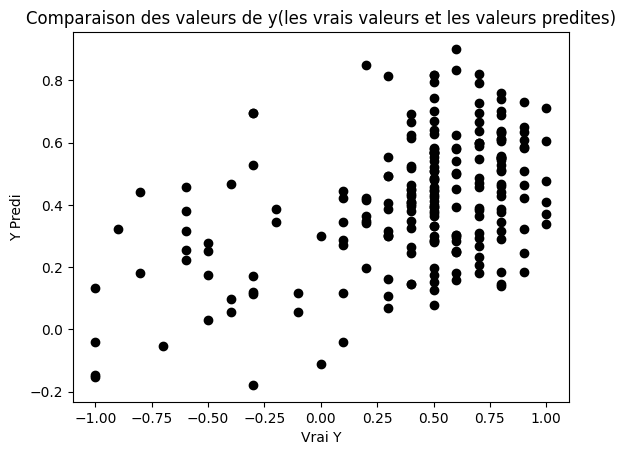

In [706]:
from __future__ import print_function
# Comparing true versus predicted values
plt.scatter(y, y_pred_Test, color='black')
plt.title('Comparaison des valeurs de y(les vrais valeurs et les valeurs predites)')
plt.xlabel('Vrai Y')
plt.ylabel('Y Predi')

# Model evaluation
y_Test = np.array(y).reshape(-1, 1)
print("Root mean squared error = %.4f" % root_mean_squared_error(y, y_pred_Test))
print('R-squared = %.4f' % r2_score(y, y_pred_Test))
print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_Test))
print("Coefficient de correlation de concordance  %.4f" % coef_corre_concor(y, y_pred_Test))
y_final = regr.predict(testdata)
result_df = pd.DataFrame(y_final, columns=["spontaneity"])
result_df.to_csv("ResultatsExamenIAA_EFEMBA_JOHANNA.csv", index=False)


## Visualisation de la correlation entre les valeurs predites et les vraies valeures

Text(0, 0.5, 'Predicted values for y')

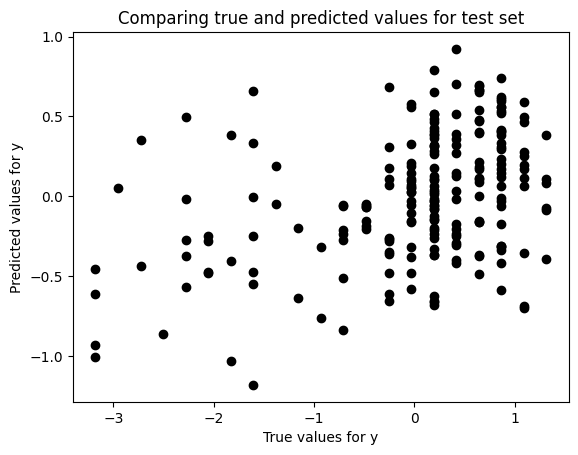

In [586]:
# Comparing true versus predicted values
plt.scatter(y, y_pred_Test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')


## Ridge Regression

In [707]:
from sklearn import linear_model

ridge = linear_model.Ridge(0.01)
ridge.fit(X_Train, y_Train)
y_pred_test_ridge = ridge.predict(X_Train)
print("Root mean squared error = %.4f" % root_mean_squared_error(y, y_pred_test_ridge))
print('R-squared = %.4f' % r2_score(y, y_pred_test_ridge))
print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_test_ridge))
print("Coefficient de correlation de concordance  %.4f" % coef_corre_concor(y, y_pred_test_ridge))
y_final = ridge.predict(testdata)

Root mean squared error = 0.3935
R-squared = 0.2177
Coefficient de correlation de pearson : 0.4666
Coefficient de correlation de concordance  0.3575


<ipython-input-707-b9cff06b1382>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_test_ridge))


## MLP Regressor

In [708]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_Train, y_Train)
y_pred_test_MLPregressor = regr.predict(X_Train)
print("Root mean squared error = %.4f" % root_mean_squared_error(y, y_pred_test_MLPregressor))
print('R-squared = %.4f' % r2_score(y, y_pred_test_MLPregressor))
print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_test_MLPregressor))
print("Coefficient de correlation de concordance  %.4f" % coef_corre_concor(y, y_pred_test_MLPregressor))
y_final = regr.predict(testdata)

Root mean squared error = 0.1329
R-squared = 0.9108
Coefficient de correlation de pearson : 0.9586
Coefficient de correlation de concordance  0.9493


<ipython-input-708-e5c58a426fd5>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Coefficient de correlation de pearson : %.4f" % r_regression(y_Test, y_pred_test_MLPregressor))
